In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
np.float = float

In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
np.random.seed(42)
x = np.random.randn(100,3)
x

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ,  1.46564877],
       [-0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358],
       [ 0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722],
       [-1.05771093,  0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012, -1.32818605],
       [ 0.19686124,  0.73846658,  0.17136828],
       [-0.11564828, -0.3011037 , -1.47852199],
       [-0.71984421, -0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016,  0.32408397],
       [-0.38508228, -0.676922  ,  0.61167629],
       [ 1.03099952,  0.93128012, -0.83921752],
       [-0.30921238,  0.33126343,  0.97554513],
       [-0.47917424, -0.18565898, -1.106

In [5]:
np.random.seed(42)
y = 3*x[:,1]+2*x[:,2]+3*x[:,0]+np.random.randn(100)*0.5
y

array([ 2.61908371e+00,  3.32922338e+00,  6.42483813e+00,  6.74824734e-02,
       -8.58086627e+00, -4.21392976e+00, -3.24007938e+00, -2.94052330e+00,
       -3.83710475e+00, -9.86929493e-01,  3.49301142e+00, -3.38005023e+00,
       -7.78781055e+00,  2.19207989e+00, -5.06975883e+00, -1.70834825e+00,
       -4.11651322e+00, -1.80553660e+00,  3.75439184e+00,  1.31109157e+00,
       -3.47434521e+00,  1.44854950e+00,  3.55160448e+00,  1.51252659e+00,
       -9.25228720e-01,  2.18429531e+00, -6.70226498e+00,  4.65632842e+00,
       -2.40026705e+00,  2.77660709e-01,  1.49220813e+00, -4.16020170e+00,
        1.67500495e+00, -6.32001974e+00, -3.34627432e+00,  6.60944407e+00,
       -3.18379721e+00,  4.04779817e+00, -4.05957431e-01,  1.52473101e+00,
        2.81975539e+00,  2.02161349e+00, -4.52902358e+00, -6.17584315e+00,
       -4.34424331e+00,  1.29599820e+00, -1.02744081e+00, -3.19261066e-03,
        8.23024721e-01, -2.68309587e+00,  5.92815721e-01, -4.52654649e-02,
        4.29775430e+00,  

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr = lr.predict(x_test)

In [8]:
ridge= Ridge(alpha=5)
ridge.fit(x_train,y_train)
y_ridge = ridge.predict(x_test)

In [9]:
mean_squared_error(y_test,y_lr)

0.16196318649084185

In [10]:
mean_squared_error(y_test,y_ridge)

0.4231994018698123

In [11]:
errors=[]
for i in [0,0.001,0.01,0.5,1,2,3,4,5,10,100,1000]:
    ridge=Ridge(alpha=i)
    ridge.fit(x_train,y_train)
    errors.append(mean_squared_error(y_test,ridge.predict(x_test)))

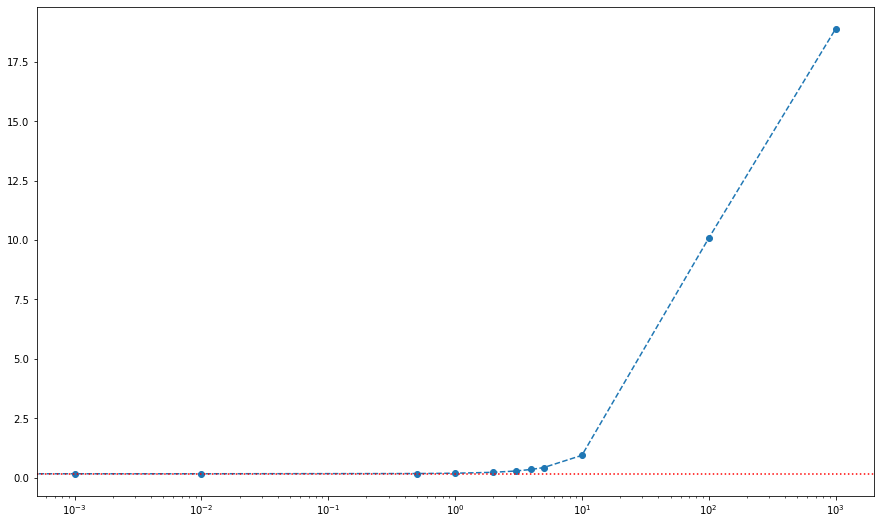

In [12]:
plt.figure(figsize=(15,9))
plt.plot(np.array([0,0.001,0.01,0.5,1,2,3,4,5,10,100,1000]),errors,label='Testing',marker='o',linestyle='--')
plt.axhline(mean_squared_error(y_test,y_lr),linestyle=':', color = 'red',label='LinearRegression')
plt.xscale('log')

In [13]:
lr.coef_

array([3.09003216, 2.92290777, 2.01004373])

In [14]:
ridge.coef_

array([0.131371  , 0.13787529, 0.07113739])